In [2]:
import fiftyone as fo


In [3]:
dataset = fo.zoo.load_zoo_dataset(
              "open-images-v7",
              split="train",
              label_types=["detections"],
              classes=["Cat"],
            #   max_samples=10,
          )

 100% |██████|    4.8Gb/4.8Gb [29.7s elapsed, 0s remaining, 161.9Mb/s]      
 100% |███████████████| 12516/12516 [5.5m elapsed, 0s remaining, 35.8 files/s]       
Dataset info written to '/Users/ryan.wong/fiftyone/open-images-v7/info.json'
Loading 'open-images-v7' split 'train'
 100% |█████████████| 12516/12516 [36.2s elapsed, 0s remaining, 352.3 samples/s]      
Dataset 'open-images-v7-train' created


In [54]:
for i, sample in enumerate(dataset[:100]):
    print(i, sample['ground_truth']['detections'][0]['bounding_box'])
#     # print(sample['ground_truth'])


0 [0.019608, 0.02451, 0.978758, 0.952614]
1 [0.003125, 0.0075, 0.99625, 0.9916670000000001]
2 [0.15625, 0.0, 0.535625, 0.983067]
3 [0.099167, 0.396875, 0.614166, 0.30937500000000007]
4 [0.0, 0.0, 0.7725, 0.998889]
5 [0.411875, 0.0, 0.494375, 0.996248]
6 [0.089, 0.098, 0.8250000000000001, 0.8130000000000001]
7 [0.0, 0.005168, 0.639535, 0.9767440000000001]
8 [0.009375, 0.052083, 0.989844, 0.764584]
9 [0.281875, 0.215833, 0.46499999999999997, 0.6408339999999999]
10 [0.0, 0.0, 0.999231, 0.999071]
11 [0.08, 0.0, 0.9175000000000001, 0.996255]
12 [0.0, 0.0, 0.999317, 0.998975]
13 [0.0, 0.1325, 0.879375, 0.6575]
14 [0.16125, 0.207778, 0.623125, 0.634444]
15 [0.527205, 0.25875, 0.10037499999999999, 0.07]
16 [0.313333, 0.51125, 0.475834, 0.25625]
17 [0.176875, 0.348333, 0.278125, 0.37916700000000003]
18 [0.0, 0.0, 0.600625, 0.290712]
19 [0.0, 0.030833, 0.533125, 0.690834]
20 [0.0, 0.0, 0.84875, 0.999062]
21 [0.2225, 0.566875, 0.6325, 0.2975]
22 [0.135, 0.075047, 0.44062500000000004, 0.8424010000

In [52]:
# image plotter taken from assignment 3
from sklearn import datasets
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline
import matplotlib.pyplot as plt

def plot_images(data):
    num_plots = data.shape[0] if (type(data) is np.array) else len(data)
    fig = plt.figure(figsize=(num_plots, 10.*num_plots))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, num_plots), axes_pad=0.1)
    for i in range(num_plots):
        grid[i].imshow(data[i])
    plt.show()

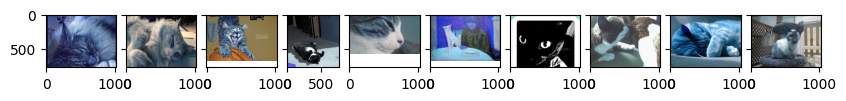

In [53]:
import cv2
import numpy as np

n_samples = 10
images = []
# images = np.empty(n_samples)
for i, sample in enumerate(dataset[:n_samples]):
    images.append(cv2.imread(sample['filepath']))
plot_images(images)